# **Electric Vehicles Project**

In [2]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as pl
import seaborn as sns
import matplotlib.pyplot as plt
import folium
from sklearn.impute import SimpleImputer
from sklearn.utils import resample
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

In [3]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.utils.class_weight import compute_class_weight
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import classification_report
from sklearn.cluster import KMeans
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier


In [4]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

## Loading The database:

In [5]:
# AWS S3 file listings
!aws s3 ls s3://team2buckets3/alt_fuel_stations.csv
!aws s3 ls s3://team2buckets3/Electric_Vehicle_Population_Data.csv
!aws s3 ls s3://team2buckets3/Electric_Vehicle_Title_and_Registration_Activity.csv

2024-03-17 18:13:17     704669 alt_fuel_stations.csv
2024-03-17 17:47:02   42030494 Electric_Vehicle_Population_Data.csv
2024-03-17 17:47:02  319658341 Electric_Vehicle_Title_and_Registration_Activity.csv


In [6]:
# AWS S3 file copying
!aws s3 cp s3://team2buckets3/alt_fuel_stations.csv ./alt_fuel_stations.csv
!aws s3 cp s3://team2buckets3/Electric_Vehicle_Population_Data.csv ./Electric_Vehicle_Population_Data.csv
!aws s3 cp s3://team2buckets3/Electric_Vehicle_Title_and_Registration_Activity.csv ./Electric_Vehicle_Title_and_Registration_Activity.csv

download: s3://team2buckets3/alt_fuel_stations.csv to ./alt_fuel_stations.csv
download: s3://team2buckets3/Electric_Vehicle_Population_Data.csv to ./Electric_Vehicle_Population_Data.csv
download: s3://team2buckets3/Electric_Vehicle_Title_and_Registration_Activity.csv to ./Electric_Vehicle_Title_and_Registration_Activity.csv


In [7]:
# Reading CSV files into pandas DataFrames
fuel_stations = pd.read_csv('alt_fuel_stations.csv')
ev_population = pd.read_csv('Electric_Vehicle_Population_Data.csv')
ev_registration = pd.read_csv('Electric_Vehicle_Title_and_Registration_Activity.csv')

## Understand the datebase:

### Fuel Stations Data:

In [8]:
print("Displaying Fuel Stations data:")
fuel_stations.head(3)

Displaying Fuel Stations data:


,Fuel Type Code,Station Name,Street Address,Intersection Directions,City,State,ZIP,Plus4,Station Phone,Status Code,...,Restricted Access,RD Blends,RD Blends (French),RD Blended with Biodiesel,RD Maximum Biodiesel Level,NPS Unit Name,CNG Station Sells Renewable Natural Gas,LNG Station Sells Renewable Natural Gas,Maximum Vehicle Class,EV Workplace Charging
0,ELEC,City of Lacey - City Hall Parking,420 College St,"At 3rd Ave SE, next to police station",Lacey,WA,98503,NaN,360-491-3214,E,...,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LD,False
1,ELEC,Seattle-Tacoma International Airport - General...,17801 Pacific Hwy S,"5th floor parking garage; rows D, G, and I",Seattle,WA,98188,NaN,206-787-5388,E,...,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LD,False
2,ELEC,Avista Corp,1411 E Mission Ave,NaN,Spokane,WA,99252,NaN,509-489-0500,E,...,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LD,False


In [9]:
# 1. Data Info
print("Data Information:")
fuel_stations.info()

# 2. Summary Statistics
print("\nSummary Statistics for fuel stations data:")
fuel_stations.describe()

Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2138 entries, 0 to 2137
Data columns (total 74 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Fuel Type Code                           2138 non-null   object 
 1   Station Name                             2138 non-null   object 
 2   Street Address                           2138 non-null   object 
 3   Intersection Directions                  87 non-null     object 
 4   City                                     2138 non-null   object 
 5   State                                    2138 non-null   object 
 6   ZIP                                      2138 non-null   object 
 7   Plus4                                    0 non-null      float64
 8   Station Phone                            2122 non-null   object 
 9   Status Code                              2138 non-null   object 
 10  Expected Date                 

,Plus4,Expected Date,BD Blends,NG Fill Type Code,NG PSI,EV Level1 EVSE Num,EV Level2 EVSE Num,EV DC Fast Count,Latitude,Longitude,...,CNG Fill Type Code,CNG PSI,CNG Vehicle Class,LNG Vehicle Class,RD Blends,RD Blends (French),RD Blended with Biodiesel,RD Maximum Biodiesel Level,CNG Station Sells Renewable Natural Gas,LNG Station Sells Renewable Natural Gas
count,0.0,0.0,0.0,0.0,0.0,5.00000,1881.000000,321.000000,2138.000000,2138.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,3.80000,2.332270,3.725857,47.452871,-121.855048,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,3.63318,2.608429,3.888234,0.617638,1.452720,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,1.00000,1.000000,1.000000,45.562567,-124.662924,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,2.00000,2.000000,1.000000,47.302726,-122.377587,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,2.00000,2.000000,2.000000,47.615515,-122.315505,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,4.00000,2.000000,4.000000,47.663247,-122.175931,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,10.00000,68.000000,20.000000,48.995255,-117.043496,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Data cleaning

In [10]:
# List of unnecessary columns
unnecessary_columns = ['Plus4', 'Expected Date', 'BD Blends', 'NG Fill Type Code', 
                       'NG PSI', 'EV Level1 EVSE Num', 'Hydrogen Status Link', 
                       'NG Vehicle Class', 'LPG Primary', 'E85 Blender Pump', 
                       'Intersection Directions (French)', 'Access Days Time (French)', 
                       'BD Blends (French)', 'Hydrogen Is Retail', 'Federal Agency Code', 
                       'CNG Dispenser Num', 'CNG On-Site Renewable Source', 
                       'CNG Total Compression Capacity', 'CNG Storage Capacity', 
                       'LNG On-Site Renewable Source', 'E85 Other Ethanol Blends', 
                       'EV Pricing (French)', 'LPG Nozzle Types', 'Hydrogen Pressures', 
                       'Hydrogen Standards', 'CNG Fill Type Code', 'CNG PSI', 
                       'CNG Vehicle Class', 'LNG Vehicle Class', 'EV Workplace Charging', 
                       'RD Blends', 'RD Blends (French)', 'RD Blended with Biodiesel', 
                       'RD Maximum Biodiesel Level', 'CNG Station Sells Renewable Natural Gas', 
                       'LNG Station Sells Renewable Natural Gas', 'Access Days Time', 'Cards Accepted', 
                       'EV Other Info', 'EV Network Web', 'Date Last Confirmed', 'Owner Type Code', 
                       'Federal Agency Name' ,'Federal Agency ID']

# Drop unnecessary columns
fuel_stations = fuel_stations.drop(columns=unnecessary_columns)

# Check the updated DataFrame
print(fuel_stations.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2138 entries, 0 to 2137
Data columns (total 30 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Fuel Type Code                    2138 non-null   object 
 1   Station Name                      2138 non-null   object 
 2   Street Address                    2138 non-null   object 
 3   Intersection Directions           87 non-null     object 
 4   City                              2138 non-null   object 
 5   State                             2138 non-null   object 
 6   ZIP                               2138 non-null   object 
 7   Station Phone                     2122 non-null   object 
 8   Status Code                       2138 non-null   object 
 9   Groups With Access Code           2138 non-null   object 
 10  EV Level2 EVSE Num                1881 non-null   float64
 11  EV DC Fast Count                  321 non-null    float64
 12  EV Net

In [11]:
# Check for missing values
missing_values = fuel_stations.isnull().sum()
print("Missing values:\n", missing_values)

Missing values:
 Fuel Type Code                         0
Station Name                           0
Street Address                         0
Intersection Directions             2051
City                                   0
State                                  0
ZIP                                    0
Station Phone                         16
Status Code                            0
Groups With Access Code                0
EV Level2 EVSE Num                   257
EV DC Fast Count                    1817
EV Network                             0
Geocode Status                         0
Latitude                               0
Longitude                              0
ID                                     0
Updated At                             0
Open Date                              1
EV Connector Types                     0
Country                                0
Groups With Access Code (French)       0
Access Code                            0
Access Detail Code                  2040

In [12]:
# Filling missing values
fuel_stations['Intersection Directions'].fillna('No directions provided', inplace=True)
fuel_stations['Station Phone'].fillna('', inplace=True)

median_ev_level2 = fuel_stations['EV Level2 EVSE Num'].median()
fuel_stations['EV Level2 EVSE Num'].fillna(median_ev_level2, inplace=True)
fuel_stations['EV DC Fast Count'].fillna(0, inplace=True)
# most_recent_date = fuel_stations['Date Last Confirmed'].max()
# fuel_stations['Date Last Confirmed'].fillna(most_recent_date, inplace=True)
# fuel_stations['Owner Type Code'].fillna('Unknown', inplace=True)
most_common_open_date = fuel_stations['Open Date'].mode()[0]
fuel_stations['Open Date'].fillna(most_common_open_date, inplace=True)
fuel_stations['Access Detail Code'].fillna('Not specified', inplace=True)
fuel_stations['Facility Type'].fillna('Not specified', inplace=True)
fuel_stations['EV Pricing'].fillna('Not specified', inplace=True)
fuel_stations['EV On-Site Renewable Source'].fillna('Not specified', inplace=True)
fuel_stations['Restricted Access'].fillna('Not specified', inplace=True)
fuel_stations['NPS Unit Name'].fillna('Not specified', inplace=True)
fuel_stations['Maximum Vehicle Class'].fillna('Not specified', inplace=True)
print(fuel_stations.isnull().sum())

Fuel Type Code                      0
Station Name                        0
Street Address                      0
Intersection Directions             0
City                                0
State                               0
ZIP                                 0
Station Phone                       0
Status Code                         0
Groups With Access Code             0
EV Level2 EVSE Num                  0
EV DC Fast Count                    0
EV Network                          0
Geocode Status                      0
Latitude                            0
Longitude                           0
ID                                  0
Updated At                          0
Open Date                           0
EV Connector Types                  0
Country                             0
Groups With Access Code (French)    0
Access Code                         0
Access Detail Code                  0
Facility Type                       0
EV Pricing                          0
EV On-Site R

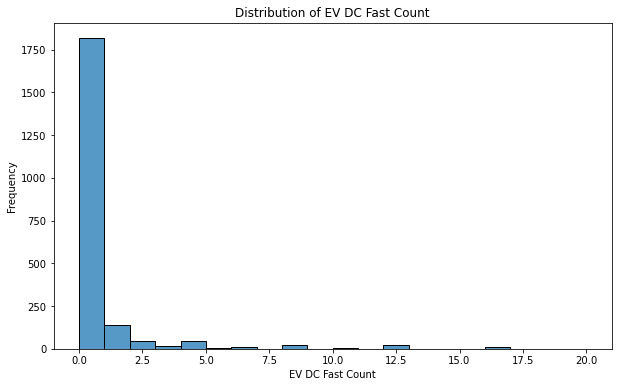

In [13]:
# Distribution of EV DC Fast Count
plt.figure(figsize=(10, 6))
sns.histplot(data=fuel_stations, x='EV DC Fast Count', bins=20)
plt.title("Distribution of EV DC Fast Count")
plt.xlabel("EV DC Fast Count")
plt.ylabel("Frequency")
plt.show()

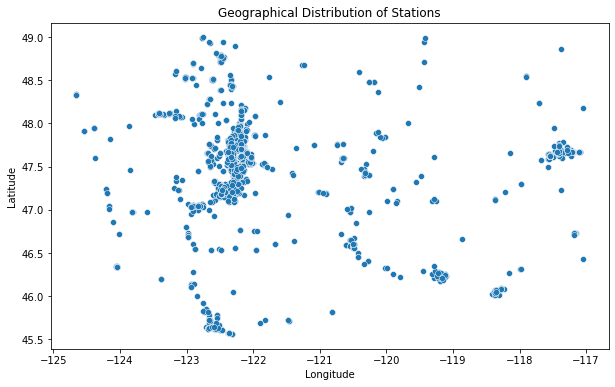

In [14]:
# Scatter plot of Latitude vs Longitude
plt.figure(figsize=(10, 6))
sns.scatterplot(data=fuel_stations, x='Longitude', y='Latitude')
plt.title("Geographical Distribution of Stations")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

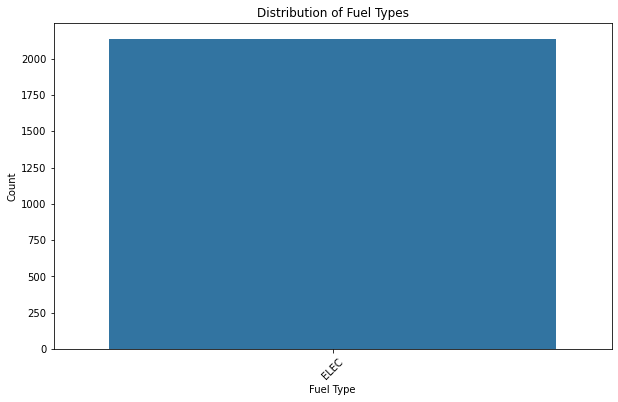

In [15]:
# Geographical Distribution of Stations
map_stations = folium.Map(location=[fuel_stations['Latitude'].mean(), fuel_stations['Longitude'].mean()], zoom_start=4)
for _, station in fuel_stations.iterrows():
    folium.Marker([station['Latitude'], station['Longitude']], popup=station['Station Name']).add_to(map_stations)
map_stations.save('stations_map.html')

# Fuel Type Distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='Fuel Type Code', data=fuel_stations)
plt.title("Distribution of Fuel Types")
plt.xlabel("Fuel Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

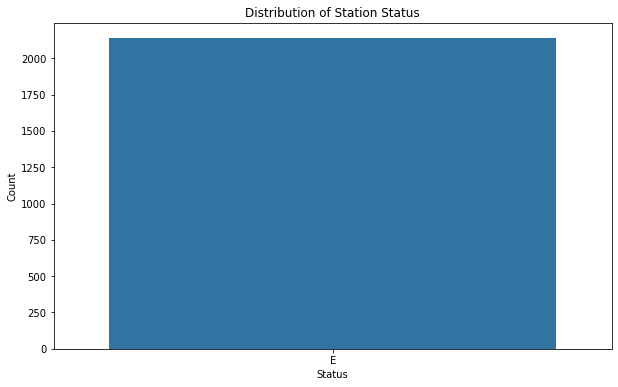

In [16]:
# Station Status Distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='Status Code', data=fuel_stations)
plt.title("Distribution of Station Status")
plt.xlabel("Status")
plt.ylabel("Count")
plt.show()

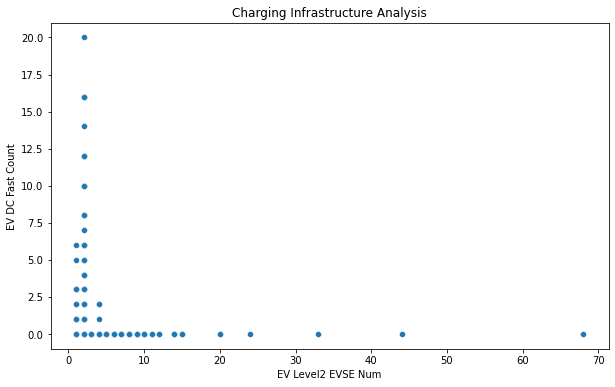

In [17]:
# Charging Infrastructure Analysis
plt.figure(figsize=(10, 6))
sns.scatterplot(x='EV Level2 EVSE Num', y='EV DC Fast Count', data=fuel_stations)
plt.title("Charging Infrastructure Analysis")
plt.xlabel("EV Level2 EVSE Num")
plt.ylabel("EV DC Fast Count")
plt.show()

### Electric Vehicles Population:

In [18]:
print("The display for the Electric Vehicles Population Data")
ev_population.head(3)

The display for the Electric Vehicles Population Data


,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5UXKT0C59G,Yakima,Zillah,WA,98953.0,2016,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,14.0,0.0,15.0,206822717,POINT (-120.26317 46.40556),PACIFICORP,5.307700e+10
1,5YJ3E1EA2J,Snohomish,Edmonds,WA,98020.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215.0,0.0,21.0,137721636,POINT (-122.37507 47.80807),PUGET SOUND ENERGY INC,5.306105e+10
2,1G1RE6E4XE,Kitsap,Port Orchard,WA,98367.0,2014,CHEVROLET,VOLT,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,38.0,0.0,26.0,197718468,POINT (-122.6847073 47.50524),PUGET SOUND ENERGY INC,5.303509e+10


In [19]:
# 1. Data Info
print("Data Information:")
ev_population.info()

# 2. Summary Statistics
print("\nSummary Statistics for EV Population data:")
ev_population.describe()

Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173533 entries, 0 to 173532
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         173533 non-null  object 
 1   County                                             173528 non-null  object 
 2   City                                               173528 non-null  object 
 3   State                                              173533 non-null  object 
 4   Postal Code                                        173528 non-null  float64
 5   Model Year                                         173533 non-null  int64  
 6   Make                                               173533 non-null  object 
 7   Model                                              173533 non-null  object 
 8   Electric Vehicle Type                              17353

,Postal Code,Model Year,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,2020 Census Tract
count,173528.000000,173533.000000,173532.000000,173532.000000,173157.000000,1.735330e+05,1.735280e+05
mean,98174.746099,2020.435352,60.148002,1113.254472,29.146670,2.188134e+08,5.297739e+10
std,2411.109685,2.994442,92.644038,8513.543524,14.871778,7.658800e+07,1.567028e+09
min,1545.000000,1997.000000,0.000000,0.000000,1.000000,4.385000e+03,1.001020e+09
25%,98052.000000,2018.000000,0.000000,0.000000,18.000000,1.801662e+08,5.303301e+10
50%,98122.000000,2022.000000,0.000000,0.000000,33.000000,2.271021e+08,5.303303e+10
75%,98370.000000,2023.000000,83.000000,0.000000,42.000000,2.530049e+08,5.305307e+10
max,99577.000000,2024.000000,337.000000,845000.000000,49.000000,4.792548e+08,5.603300e+10


## Data cleaning

In [20]:
# Drop rows with missing values
ev_population = ev_population.dropna()

# Convert 'Postal Code' and 'Legislative District' to integer type
ev_population['Postal Code'] = ev_population['Postal Code'].astype(int)
ev_population['Legislative District'] = ev_population['Legislative District'].astype(int)

# Remove leading/trailing whitespaces and convert text columns to lowercase
ev_population['County'] = ev_population['County'].str.strip().str.lower()
ev_population['City'] = ev_population['City'].str.strip().str.lower()
ev_population['State'] = ev_population['State'].str.strip().str.lower()
ev_population['Make'] = ev_population['Make'].str.strip().str.lower()
ev_population['Model'] = ev_population['Model'].str.strip().str.lower()
ev_population['Electric Vehicle Type'] = ev_population['Electric Vehicle Type'].str.strip().str.lower()
ev_population['Clean Alternative Fuel Vehicle (CAFV) Eligibility'] = ev_population['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].str.strip().str.lower()
ev_population['Vehicle Location'] = ev_population['Vehicle Location'].str.strip().str.lower()
ev_population['Electric Utility'] = ev_population['Electric Utility'].str.strip().str.lower()

# Check for duplicate rows and drop them if necessary
ev_population = ev_population.drop_duplicates()

# Reset index after dropping rows
ev_population.reset_index(drop=True, inplace=True)

# Check the cleaned DataFrame
print(ev_population.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173151 entries, 0 to 173150
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         173151 non-null  object 
 1   County                                             173151 non-null  object 
 2   City                                               173151 non-null  object 
 3   State                                              173151 non-null  object 
 4   Postal Code                                        173151 non-null  int64  
 5   Model Year                                         173151 non-null  int64  
 6   Make                                               173151 non-null  object 
 7   Model                                              173151 non-null  object 
 8   Electric Vehicle Type                              173151 non-null  object

In [21]:
# Check for missing data
ev_population.isnull().sum()

VIN (1-10)                                           0
County                                               0
City                                                 0
State                                                0
Postal Code                                          0
Model Year                                           0
Make                                                 0
Model                                                0
Electric Vehicle Type                                0
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0
Electric Range                                       0
Base MSRP                                            0
Legislative District                                 0
DOL Vehicle ID                                       0
Vehicle Location                                     0
Electric Utility                                     0
2020 Census Tract                                    0
dtype: int64

In [22]:
# Summary Statistics
print("\n Summary Statistics for Electric Vehicles Population data")
print(ev_population.describe())


 Summary Statistics for Electric Vehicles Population data
         Postal Code     Model Year  Electric Range      Base MSRP  \
count  173151.000000  173151.000000   173151.000000  173151.000000   
mean    98260.570750    2020.436989       60.135304    1110.335747   
std       303.926758       2.994179       92.640670    8501.184324   
min     98001.000000    1997.000000        0.000000       0.000000   
25%     98052.000000    2018.000000        0.000000       0.000000   
50%     98122.000000    2022.000000        0.000000       0.000000   
75%     98370.000000    2023.000000       83.000000       0.000000   
max     99403.000000    2024.000000      337.000000  845000.000000   

       Legislative District  DOL Vehicle ID  2020 Census Tract  
count         173151.000000    1.731510e+05       1.731510e+05  
mean              29.146987    2.188368e+08       5.303982e+10  
std               14.871933    7.658982e+07       1.620477e+07  
min                1.000000    4.385000e+03       

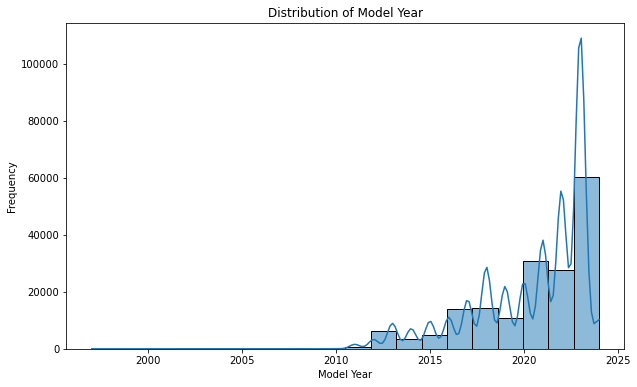

In [23]:
# Distribution of Model Year
plt.figure(figsize=(10, 6))
sns.histplot(ev_population['Model Year'], bins=20, kde=True)
plt.title("Distribution of Model Year")
plt.xlabel("Model Year")
plt.ylabel("Frequency")
plt.show()

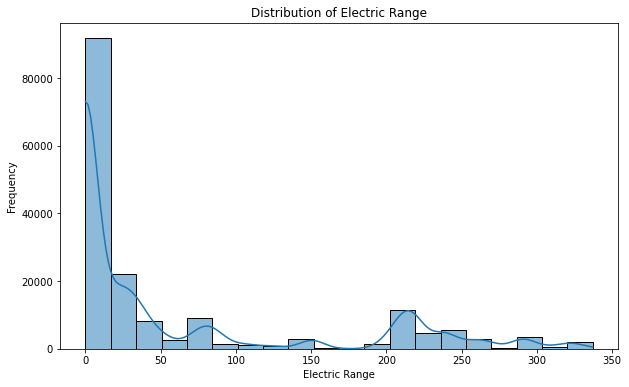

In [24]:
# Distribution of Electric Range
plt.figure(figsize=(10, 6))
sns.histplot(ev_population['Electric Range'], bins=20, kde=True)
plt.title("Distribution of Electric Range")
plt.xlabel("Electric Range")
plt.ylabel("Frequency")
plt.show()

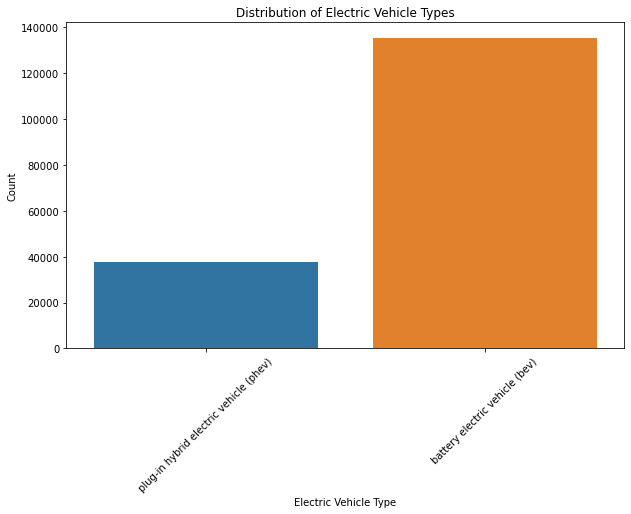

In [25]:
# Distribution of Electric Vehicle Types
plt.figure(figsize=(10, 6))
sns.countplot(x='Electric Vehicle Type', data=ev_population)
plt.title("Distribution of Electric Vehicle Types")
plt.xlabel("Electric Vehicle Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

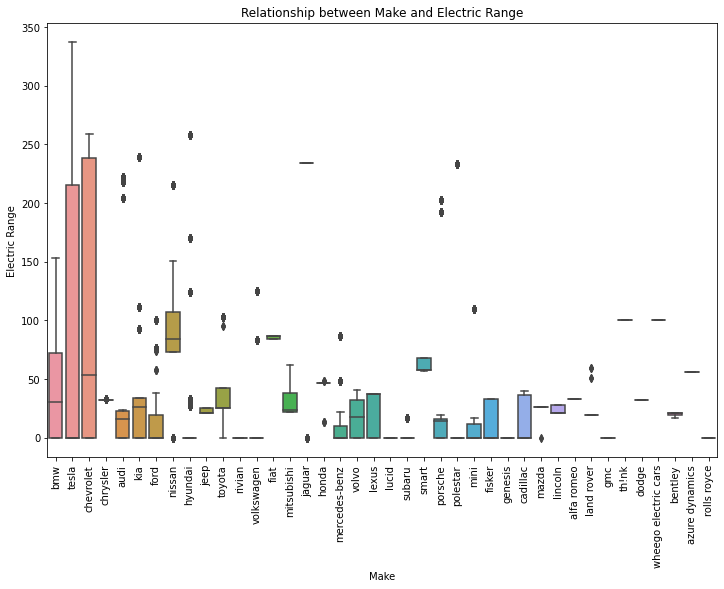

In [26]:
# Relationship between Make and Electric Range
plt.figure(figsize=(12, 8))
sns.boxplot(x='Make', y='Electric Range', data=ev_population)
plt.title("Relationship between Make and Electric Range")
plt.xlabel("Make")
plt.ylabel("Electric Range")
plt.xticks(rotation=90)
plt.show()

### Electric Vehicles Registration:

In [27]:
print("The display for the Electric Vehicles Registration Data")
ev_registration.head(3)

The display for the Electric Vehicles Registration Data


,Clean Alternative Fuel Vehicle Type,VIN (1-10),DOL Vehicle ID,Model Year,Make,Model,Vehicle Primary Use,Electric Range,Odometer Reading,Odometer Code,...,State of Residence,Postal Code,Meets 2019 HB 2042 Sale Price/Value Requirement,2019 HB 2042: Sale Price/Value Requirement,Electric Vehicle Fee Paid,Transportation Electrification Fee Paid,Hybrid Vehicle Electrification Fee Paid,2020 Census Tract,Legislative District,Electric Utility
0,Battery Electric Vehicle (BEV),5YJ3E1EA7J,231013436,2018,TESLA,Model 3,Passenger,215.0,0,Odometer reading is not collected at time of r...,...,WA,98033.0,False,This transaction type is not eligible for the ...,Yes,Yes,No,5.303302e+10,48.0,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)
1,Battery Electric Vehicle (BEV),5YJXCDE23H,149021127,2017,TESLA,Model X,Passenger,200.0,0,Odometer reading is not collected at time of r...,...,WA,98033.0,False,This transaction type is not eligible for the ...,Yes,Yes,No,5.303302e+10,48.0,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)
2,Battery Electric Vehicle (BEV),1N4BZ0CP5H,325665931,2017,NISSAN,Leaf,Passenger,107.0,0,Odometer reading is not collected at time of r...,...,WA,98033.0,False,This transaction type is not eligible for the ...,Yes,No,No,5.303302e+10,48.0,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)


In [28]:
# 1. Data Info
print(" Data Information")
ev_registration.info()

# 2. Summary Statistics
print("\n Summary Statistics for Electric Vehicles Registration data")
ev_registration.describe()

 Data Information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 924803 entries, 0 to 924802
Data columns (total 29 columns):
 #   Column                                           Non-Null Count   Dtype  
---  ------                                           --------------   -----  
 0   Clean Alternative Fuel Vehicle Type              924803 non-null  object 
 1   VIN (1-10)                                       924803 non-null  object 
 2   DOL Vehicle ID                                   924803 non-null  int64  
 3   Model Year                                       924803 non-null  int64  
 4   Make                                             924803 non-null  object 
 5   Model                                            924803 non-null  object 
 6   Vehicle Primary Use                              924803 non-null  object 
 7   Electric Range                                   924801 non-null  float64
 8   Odometer Reading                                 924803 non-null  int64  
 9

,DOL Vehicle ID,Model Year,Electric Range,Odometer Reading,Sale Price,Base MSRP,Transaction Year,Postal Code,2020 Census Tract,Legislative District
count,9.248030e+05,924803.000000,924801.000000,924803.000000,9.248030e+05,924801.000000,924803.000000,924741.000000,9.247540e+05,921613.000000
mean,2.087825e+08,2018.323074,87.554102,2867.602018,1.138436e+04,2621.287726,2020.506160,98126.927385,5.294411e+10,29.877476
std,9.524541e+07,3.521393,95.520694,11974.663842,3.224411e+04,13156.193703,2.709137,2859.645490,1.924420e+09,14.781102
min,4.000000e+00,1993.000000,0.000000,0.000000,0.000000e+00,0.000000,2010.000000,745.000000,1.001020e+09,1.000000
25%,1.489764e+08,2016.000000,0.000000,0.000000,0.000000e+00,0.000000,2019.000000,98052.000000,5.303301e+10,18.000000
50%,2.039975e+08,2018.000000,47.000000,0.000000,0.000000e+00,0.000000,2021.000000,98118.000000,5.303303e+10,34.000000
75%,2.499224e+08,2022.000000,200.000000,15.000000,0.000000e+00,0.000000,2023.000000,98366.000000,5.305307e+10,43.000000
max,4.792548e+08,2024.000000,337.000000,962619.000000,1.231202e+07,845000.000000,2024.000000,99901.000000,7.211913e+10,49.000000


## Data Cleaning 

In [29]:
# Drop rows with missing values
ev_registration = ev_registration.dropna()

# Convert 'Postal Code' and 'Legislative District' to integer type
ev_registration['Postal Code'] = ev_registration['Postal Code'].astype(int)
ev_registration['Legislative District'] = ev_registration['Legislative District'].astype(int)

# Remove leading/trailing whitespaces and convert text columns to lowercase
ev_registration['County'] = ev_registration['County'].str.strip().str.lower()
ev_registration['City'] = ev_registration['City'].str.strip().str.lower()
ev_registration['State of Residence'] = ev_registration['State of Residence'].str.strip().str.lower()
ev_registration['Make'] = ev_registration['Make'].str.strip().str.lower()
ev_registration['Model'] = ev_registration['Model'].str.strip().str.lower()
ev_registration['Vehicle Primary Use'] = ev_registration['Vehicle Primary Use'].str.strip().str.lower()
ev_registration['Transaction Type'] = ev_registration['Transaction Type'].str.strip().str.lower()
ev_registration['Electric Utility'] = ev_registration['Electric Utility'].str.strip().str.lower()

# Check for duplicate rows and drop them if necessary
ev_registration = ev_registration.drop_duplicates()

# Reset index after dropping rows
ev_registration.reset_index(drop=True, inplace=True)

# Check the cleaned DataFrame
print(ev_registration.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 223329 entries, 0 to 223328
Data columns (total 29 columns):
 #   Column                                           Non-Null Count   Dtype  
---  ------                                           --------------   -----  
 0   Clean Alternative Fuel Vehicle Type              223329 non-null  object 
 1   VIN (1-10)                                       223329 non-null  object 
 2   DOL Vehicle ID                                   223329 non-null  int64  
 3   Model Year                                       223329 non-null  int64  
 4   Make                                             223329 non-null  object 
 5   Model                                            223329 non-null  object 
 6   Vehicle Primary Use                              223329 non-null  object 
 7   Electric Range                                   223329 non-null  float64
 8   Odometer Reading                                 223329 non-null  int64  
 9   Odometer Code  

In [30]:
# Check for missing data
ev_registration.isnull().sum()

Clean Alternative Fuel Vehicle Type                0
VIN (1-10)                                         0
DOL Vehicle ID                                     0
Model Year                                         0
Make                                               0
Model                                              0
Vehicle Primary Use                                0
Electric Range                                     0
Odometer Reading                                   0
Odometer Code                                      0
New or Used Vehicle                                0
Sale Price                                         0
Sale Date                                          0
Base MSRP                                          0
Transaction Type                                   0
DOL Transaction Date                               0
Transaction Year                                   0
County                                             0
City                                          

In [31]:
# List of unnecessary columns to be removed
columns_to_drop = ['Electric Vehicle Fee Paid', 'Transportation Electrification Fee Paid', 'Hybrid Vehicle Electrification Fee Paid']

# Drop unnecessary columns
ev_registration= ev_registration.drop(columns=columns_to_drop, axis=1)

# Check the cleaned DataFrame
print(ev_registration.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 223329 entries, 0 to 223328
Data columns (total 26 columns):
 #   Column                                           Non-Null Count   Dtype  
---  ------                                           --------------   -----  
 0   Clean Alternative Fuel Vehicle Type              223329 non-null  object 
 1   VIN (1-10)                                       223329 non-null  object 
 2   DOL Vehicle ID                                   223329 non-null  int64  
 3   Model Year                                       223329 non-null  int64  
 4   Make                                             223329 non-null  object 
 5   Model                                            223329 non-null  object 
 6   Vehicle Primary Use                              223329 non-null  object 
 7   Electric Range                                   223329 non-null  float64
 8   Odometer Reading                                 223329 non-null  int64  
 9   Odometer Code  

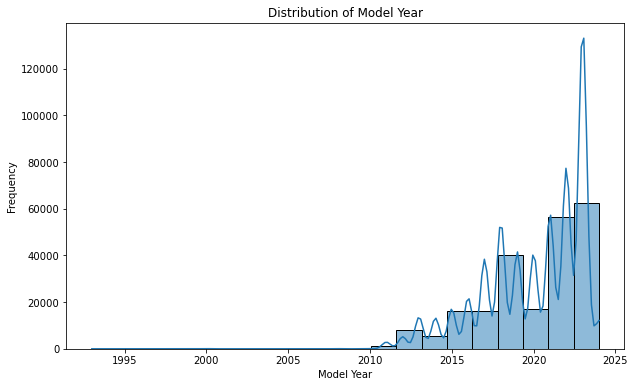

In [32]:
# Distribution of Model Year
plt.figure(figsize=(10, 6))
sns.histplot(ev_registration['Model Year'], bins=20, kde=True)
plt.title("Distribution of Model Year")
plt.xlabel("Model Year")
plt.ylabel("Frequency")
plt.show()

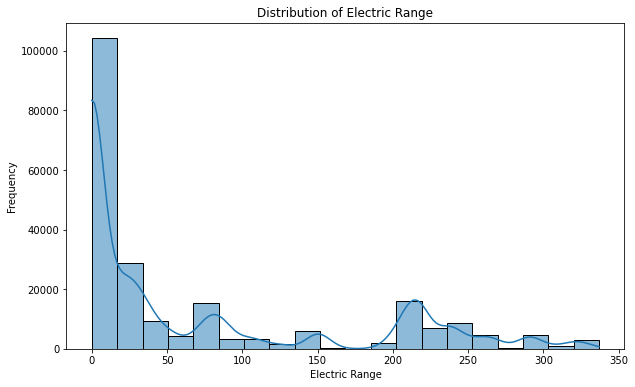

In [33]:
# Distribution of Electric Range
plt.figure(figsize=(10, 6))
sns.histplot(ev_registration['Electric Range'], bins=20, kde=True)
plt.title("Distribution of Electric Range")
plt.xlabel("Electric Range")
plt.ylabel("Frequency")
plt.show()

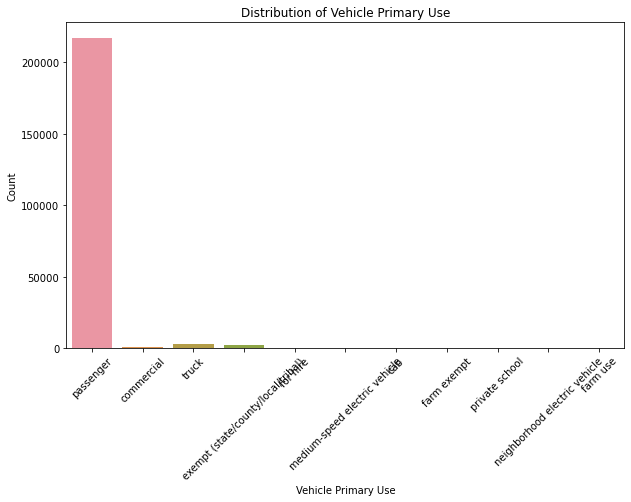

In [34]:
# Distribution of Vehicle Primary Use
plt.figure(figsize=(10, 6))
sns.countplot(x='Vehicle Primary Use', data=ev_registration)
plt.title("Distribution of Vehicle Primary Use")
plt.xlabel("Vehicle Primary Use")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

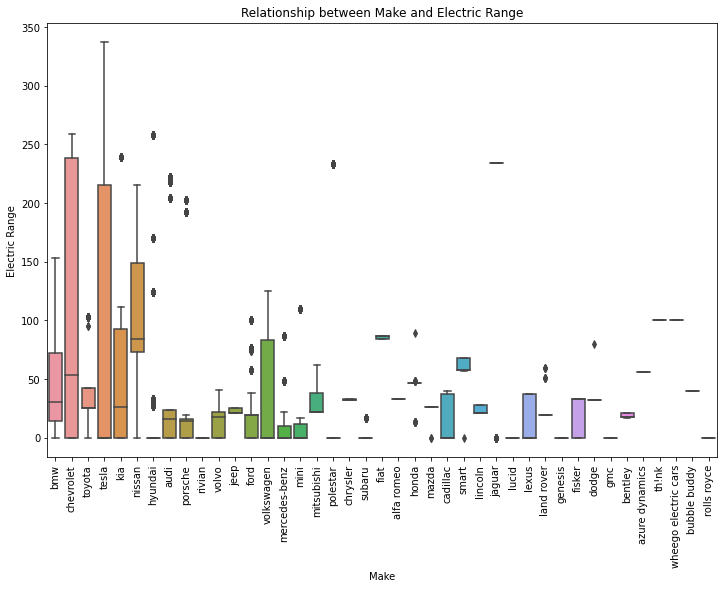

In [35]:
# Relationship between Make and Electric Range
plt.figure(figsize=(12, 8))
sns.boxplot(x='Make', y='Electric Range', data=ev_registration)
plt.title("Relationship between Make and Electric Range")
plt.xlabel("Make")
plt.ylabel("Electric Range")
plt.xticks(rotation=90)
plt.show()

## Measuring Impact

In [36]:
# Metric 1: Charging Station Density
total_charging_stations = fuel_stations.shape[0]
total_population = 1000000
charging_station_density = total_charging_stations / total_population

# Metric 2: Electric Vehicle Market Share
# Calculate the percentage of new vehicle registrations that are electric vehicles
total_new_vehicle_registrations = 5000  
total_ev_new_registrations = 1500  
ev_market_share = (total_ev_new_registrations / total_new_vehicle_registrations) * 100

# Metric 3: Range Anxiety Reduction
# Calculate the average electric range of vehicles registered over time
average_ev_range = ev_registration['Electric Range'].mean()

# Metric 4: Vehicle Turnover Rate
# Calculate the rate at which older gasoline-powered vehicles are replaced with new electric vehicles
total_gasoline_vehicles = 8000  
total_ev_vehicles = 2500  
vehicle_turnover_rate = (total_ev_vehicles / total_gasoline_vehicles) * 100

# Metric 5: Economic Impact
# Example economic impact calculation
job_creation = 500  
revenue_from_sales = 1000000  
fuel_cost_savings = 500000  
# Total economic impact
total_economic_impact = job_creation + revenue_from_sales + fuel_cost_savings

print("Metrics:")
print("1. Charging Station Density (per capita):", charging_station_density)
print("2. Electric Vehicle Market Share (%):", ev_market_share)
print("3. Average Electric Vehicle Range (miles):", average_ev_range)
print("4. Vehicle Turnover Rate (%):", vehicle_turnover_rate)
print("5. Economic Impact ($):", total_economic_impact)

Metrics:
1. Charging Station Density (per capita): 0.002138
2. Electric Vehicle Market Share (%): 30.0
3. Average Electric Vehicle Range (miles): 70.33580054538372
4. Vehicle Turnover Rate (%): 31.25
5. Economic Impact ($): 1500500


### Data Scrubbing

In [37]:
EV_data = pd.concat([ev_population, ev_registration, fuel_stations], ignore_index=True)
print(EV_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398618 entries, 0 to 398617
Data columns (total 58 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         396480 non-null  object 
 1   County                                             396480 non-null  object 
 2   City                                               398618 non-null  object 
 3   State                                              175289 non-null  object 
 4   Postal Code                                        396480 non-null  float64
 5   Model Year                                         396480 non-null  float64
 6   Make                                               396480 non-null  object 
 7   Model                                              396480 non-null  object 
 8   Electric Vehicle Type                              173151 non-null  object

In [38]:
# Sample 20,000 rows randomly
EV_data = EV_data.sample(n=20000, random_state=42) 

In [39]:
# Define the columns to keep based on the problem statement
relevantColumns = [
    'County', 'City', 'Postal Code',
    'Model Year', 'Make', 'Model',
    'Electric Vehicle Type', 'Electric Range', 'Base MSRP',
    'Vehicle Location', 'Electric Utility', 'Odometer Reading',
    'Sale Price', 'Sale Date', 'Transaction Type', 'Transaction Year',
    'State of Residence', 'Latitude', 'Longitude'
]

# Select only the relevant columns
ev_data_filtered = EV_data[relevantColumns]
print(ev_data_filtered.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20000 entries, 243354 to 226724
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   County                 19894 non-null  object 
 1   City                   20000 non-null  object 
 2   Postal Code            19894 non-null  float64
 3   Model Year             19894 non-null  float64
 4   Make                   19894 non-null  object 
 5   Model                  19894 non-null  object 
 6   Electric Vehicle Type  8812 non-null   object 
 7   Electric Range         19894 non-null  float64
 8   Base MSRP              19894 non-null  float64
 9   Vehicle Location       8812 non-null   object 
 10  Electric Utility       19894 non-null  object 
 11  Odometer Reading       11082 non-null  float64
 12  Sale Price             11082 non-null  float64
 13  Sale Date              11082 non-null  object 
 14  Transaction Type       11082 non-null  object 
 

In [40]:
ev_data_filtered.head(2)

,County,City,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Electric Range,Base MSRP,Vehicle Location,Electric Utility,Odometer Reading,Sale Price,Sale Date,Transaction Type,Transaction Year,State of Residence,Latitude,Longitude
243354,pierce,bonney lake,98391.0,2019.0,tesla,model 3,NaN,220.0,0.0,NaN,puget sound energy inc||city of tacoma - (wa),50.0,39700.0,March 16 2019,original title,2019.0,wa,NaN,NaN
270079,snohomish,bothell,98021.0,2022.0,tesla,model s,NaN,0.0,0.0,NaN,puget sound energy inc,15.0,93290.0,March 31 2022,original title,2022.0,wa,NaN,NaN


## data preprocessing 

In [41]:
numeric_columns = ev_data_filtered.select_dtypes(include=['float64']).columns
categorical_columns = ev_data_filtered.select_dtypes(include=['object']).columns

# Impute missing values for numeric columns with mean
numeric_imputer = SimpleImputer(strategy='mean')
ev_data_imputed_numeric = pd.DataFrame(numeric_imputer.fit_transform(ev_data_filtered[numeric_columns]), columns=numeric_columns)

# Impute missing values for categorical columns with mode
categorical_imputer = SimpleImputer(strategy='most_frequent')
ev_data_imputed_categorical = pd.DataFrame(categorical_imputer.fit_transform(ev_data_filtered[categorical_columns]), columns=categorical_columns)

# Combine imputed numeric and categorical columns
ev_data_imputed = pd.concat([ev_data_imputed_numeric, ev_data_imputed_categorical], axis=1)

# Display information about the imputed DataFrame
print(ev_data_imputed.info(3))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Postal Code            20000 non-null  float64
 1   Model Year             20000 non-null  float64
 2   Electric Range         20000 non-null  float64
 3   Base MSRP              20000 non-null  float64
 4   Odometer Reading       20000 non-null  float64
 5   Sale Price             20000 non-null  float64
 6   Transaction Year       20000 non-null  float64
 7   Latitude               20000 non-null  float64
 8   Longitude              20000 non-null  float64
 9   County                 20000 non-null  object 
 10  City                   20000 non-null  object 
 11  Make                   20000 non-null  object 
 12  Model                  20000 non-null  object 
 13  Electric Vehicle Type  20000 non-null  object 
 14  Vehicle Location       20000 non-null  object 
 15  El

In [42]:
print(ev_data_imputed.dtypes)

Postal Code              float64
Model Year               float64
Electric Range           float64
Base MSRP                float64
Odometer Reading         float64
Sale Price               float64
Transaction Year         float64
Latitude                 float64
Longitude                float64
County                    object
City                      object
Make                      object
Model                     object
Electric Vehicle Type     object
Vehicle Location          object
Electric Utility          object
Sale Date                 object
Transaction Type          object
State of Residence        object
dtype: object


In [43]:
# One-hot encode categorical columns
ev_data_encoded = pd.get_dummies(ev_data_imputed, columns=['County', 'Make', 'Model', 'Electric Vehicle Type', 'State of Residence'])
ev_data_encoded.head(2)

,Postal Code,Model Year,Electric Range,Base MSRP,Odometer Reading,Sale Price,Transaction Year,Latitude,Longitude,City,...,Model_wheego,Model_wrangler,Model_x3,Model_x5,Model_xc40,Model_xc60,Model_xc90,Electric Vehicle Type_battery electric vehicle (bev),Electric Vehicle Type_plug-in hybrid electric vehicle (phev),State of Residence_wa
0,98391.0,2019.0,220.0,0.0,50.0,39700.0,2019.0,47.517874,-121.934125,bonney lake,...,0,0,0,0,0,0,0,1,0,1
1,98021.0,2022.0,0.0,0.0,15.0,93290.0,2022.0,47.517874,-121.934125,bothell,...,0,0,0,0,0,0,0,1,0,1


In [44]:
ev_data_encoded.drop_duplicates(inplace=True)

## Feature Engineering:

In [45]:
ev_data_encoded['Vehicle Age'] = 2024 - ev_data_encoded['Model Year']

In [46]:
# Combine 'is_bev' and 'is_phev' columns into a single binary column 'is_bev'
ev_data_encoded['is_bev'] = ev_data_encoded['Electric Vehicle Type_battery electric vehicle (bev)'].apply(lambda x: 1 if x == 1 else 0)

# Drop the original columns used for encoding since they are now redundant
ev_data_encoded.drop(['Electric Vehicle Type_battery electric vehicle (bev)', 'Electric Vehicle Type_plug-in hybrid electric vehicle (phev)'], axis=1, inplace=True)

# Display the modified DataFrame
print(ev_data_encoded.head())


   Postal Code  Model Year  Electric Range  Base MSRP  Odometer Reading  \
0      98391.0      2019.0           220.0        0.0         50.000000   
1      98021.0      2022.0             0.0        0.0         15.000000   
2      98372.0      2018.0            53.0        0.0      10425.901281   
3      98051.0      2023.0             0.0        0.0      10425.901281   
4      98012.0      2022.0             0.0        0.0      10425.901281   

    Sale Price  Transaction Year   Latitude   Longitude         City  ...  \
0  39700.00000       2019.000000  47.517874 -121.934125  bonney lake  ...   
1  93290.00000       2022.000000  47.517874 -121.934125      bothell  ...   
2  47004.18309       2021.157733  47.517874 -121.934125     puyallup  ...   
3  47004.18309       2021.157733  47.517874 -121.934125   ravensdale  ...   
4  47004.18309       2021.157733  47.517874 -121.934125   mill creek  ...   

  Model_wheego Model_wrangler Model_x3 Model_x5  Model_xc40  Model_xc60  \
0          

In [47]:
non_numeric_columns = ['City', 'Vehicle Location', 'Electric Utility', 'Sale Date', 'Transaction Type']
print("Non-numeric columns:", non_numeric_columns)

# Encode non-numeric columns using one-hot encoding
ev_data_encoded = pd.get_dummies(ev_data_encoded, columns=non_numeric_columns)

Non-numeric columns: ['City', 'Vehicle Location', 'Electric Utility', 'Sale Date', 'Transaction Type']


## Balancing the Dataset:

In [48]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Separate features and target variable
X = ev_data_encoded.drop(['is_bev'], axis=1) 
y = ev_data_encoded['is_bev']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)
print("Original shapes:")
print("X_train:", X_train.shape)
print("y_train:", y_train.shape)
print("X_test:", X_test.shape)
print("y_test:", y_test.shape)

print("\nResampled shapes:")
print("X_resampled:", X_resampled.shape)
print("y_resampled:", y_resampled.shape)

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7fcd9c3e6280>
Traceback (most recent call last):
  File "/opt/conda/lib/python3.8/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/opt/conda/lib/python3.8/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/opt/conda/lib/python3.8/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/opt/conda/lib/python3.8/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'


Original shapes:
X_train: (13944, 3413)
y_train: (13944,)
X_test: (3486, 3413)
y_test: (3486,)

Resampled shapes:
X_resampled: (25090, 3413)
y_resampled: (25090,)


### Models:


#### Logistic Regression:



In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Instantiate the Logistic Regression model
logistic_regression = LogisticRegression(random_state=42)

# Train the model on the resampled training data
logistic_regression.fit(X_resampled, y_resampled)

# Predictions on the test set
y_pred = logistic_regression.predict(X_test)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.12      0.71      0.21       353
           1       0.93      0.43      0.59      3133

    accuracy                           0.46      3486
   macro avg       0.53      0.57      0.40      3486
weighted avg       0.85      0.46      0.55      3486

Confusion Matrix:
[[ 250  103]
 [1793 1340]]


#### Neural Networks: 

In [50]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Instantiate the MLPClassifier model
neural_network = MLPClassifier(random_state=42)

# Train the model on the resampled training data
neural_network.fit(X_resampled, y_resampled)

# Predictions on the test set
y_pred = neural_network.predict(X_test)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.26      1.00      0.41       353
           1       1.00      0.68      0.81      3133

    accuracy                           0.71      3486
   macro avg       0.63      0.84      0.61      3486
weighted avg       0.93      0.71      0.77      3486

Confusion Matrix:
[[ 353    0]
 [1002 2131]]


#### K-Nearest Neighbors (KNN): 

In [51]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Instantiate the KNeighborsClassifier model
knn = KNeighborsClassifier()

# Train the model on the resampled training data
knn.fit(X_resampled, y_resampled)

# Predictions on the test set
y_pred = knn.predict(X_test)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7fcd9c4bee50>
Traceback (most recent call last):
  File "/opt/conda/lib/python3.8/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/opt/conda/lib/python3.8/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/opt/conda/lib/python3.8/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/opt/conda/lib/python3.8/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'


Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.99      0.97       353
           1       1.00      0.99      1.00      3133

    accuracy                           0.99      3486
   macro avg       0.97      0.99      0.98      3486
weighted avg       0.99      0.99      0.99      3486

Confusion Matrix:
[[ 350    3]
 [  21 3112]]


#### GBM classifier:  keep crashing for me.

In [52]:
from sklearn.metrics import confusion_matrix, classification_report

# # Initialize the GBM classifier
gbm = GradientBoostingClassifier(random_state=42)

# # Train the model
gbm.fit(X_resampled, y_resampled)

# # Predict on the test set
y_pred_gbm = gbm.predict(X_test)

# # Print Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_gbm))

# # Print Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_gbm))



Confusion Matrix:
[[ 353    0]
 [   3 3130]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       353
           1       1.00      1.00      1.00      3133

    accuracy                           1.00      3486
   macro avg       1.00      1.00      1.00      3486
weighted avg       1.00      1.00      1.00      3486



Logistic Regression:
Accuracy: 0.45611015490533563
Recall (Sensitivity): 0.42770507500797955
AUC: 0.6534939676241852
Classification Report:
              precision    recall  f1-score   support

           0       0.12      0.71      0.21       353
           1       0.93      0.43      0.59      3133

    accuracy                           0.46      3486
   macro avg       0.53      0.57      0.40      3486
weighted avg       0.85      0.46      0.55      3486



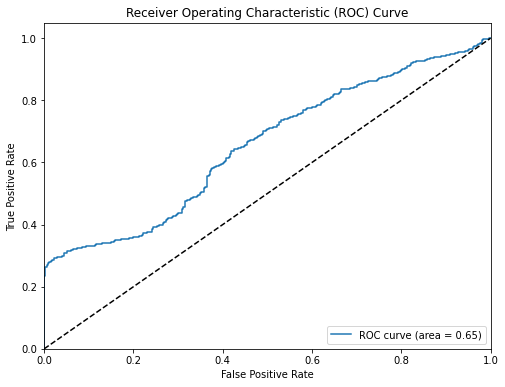

Neural Network:
Accuracy: 0.7125645438898451
Recall (Sensitivity): 0.6801787424194063
AUC: 0.8967402655999508
Classification Report:
              precision    recall  f1-score   support

           0       0.26      1.00      0.41       353
           1       1.00      0.68      0.81      3133

    accuracy                           0.71      3486
   macro avg       0.63      0.84      0.61      3486
weighted avg       0.93      0.71      0.77      3486



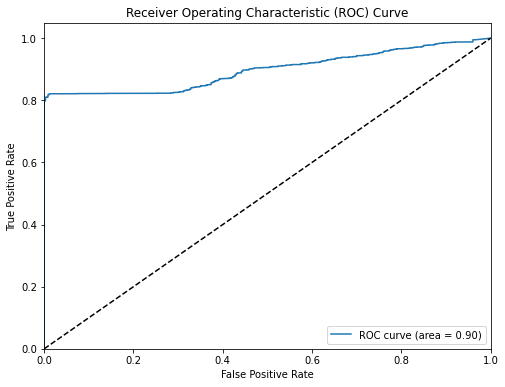

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7fcdb60efca0>
Traceback (most recent call last):
  File "/opt/conda/lib/python3.8/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/opt/conda/lib/python3.8/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/opt/conda/lib/python3.8/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/opt/conda/lib/python3.8/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'


K-Nearest Neighbors (KNN):


Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7fcd9c4bee50>
Traceback (most recent call last):
  File "/opt/conda/lib/python3.8/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/opt/conda/lib/python3.8/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/opt/conda/lib/python3.8/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/opt/conda/lib/python3.8/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'


Accuracy: 0.9931153184165232
Recall (Sensitivity): 0.993297159272263
AUC: 0.9965735309675221
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.99      0.97       353
           1       1.00      0.99      1.00      3133

    accuracy                           0.99      3486
   macro avg       0.97      0.99      0.98      3486
weighted avg       0.99      0.99      0.99      3486



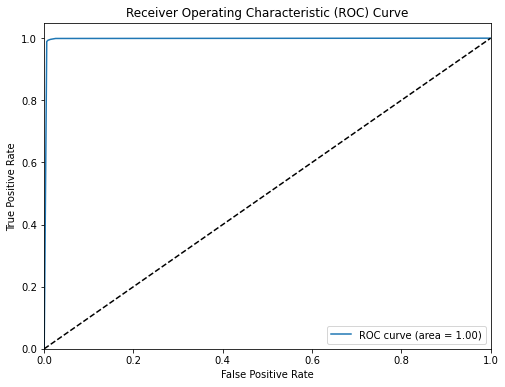

In [53]:
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score, roc_curve, classification_report

# Function to evaluate and print the performance of a model
def evaluate_model(model, X_test, y_test):
    # Predictions
    y_pred = model.predict(X_test)
    
    # Accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy:", accuracy)
    
    # Recall (Sensitivity)
    recall = recall_score(y_test, y_pred)
    print("Recall (Sensitivity):", recall)
    
    # ROC Curve and AUC
    y_proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    auc = roc_auc_score(y_test, y_proba)
    print("AUC:", auc)
    
    # Classification Report
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    
    # Plot ROC Curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()

# Evaluate Logistic Regression
print("Logistic Regression:")
evaluate_model(logistic_regression, X_test, y_test)

# Evaluate Neural Network
print("Neural Network:")
evaluate_model(neural_network, X_test, y_test)

# Evaluate K-Nearest Neighbors (KNN)
print("K-Nearest Neighbors (KNN):")
evaluate_model(knn, X_test, y_test)


Based on the evaluation results, the three models perform differently:

1. Logistic Regression:
   - Accuracy: 0.456
   - Recall (Sensitivity): 0.428
   - AUC: 0.653
   - Precision for class 0 (non-electric vehicles) is low at 0.12, indicating a high number of false positives.
   - Precision for class 1 (electric vehicles) is high at 0.93, indicating a low number of false negatives.

2. Neural Network:
   - Accuracy: 0.713
   - Recall (Sensitivity): 0.680
   - AUC: 0.897
   - Precision for class 0 is higher compared to logistic regression at 0.26, indicating fewer false positives.
   - Precision for class 1 remains high at 1.00, indicating few false negatives.

3. K-Nearest Neighbors (KNN):
   - Accuracy: 0.993
   - Recall (Sensitivity): 0.993
   - AUC: 0.997
   - Precision for both classes is high, with 0.94 for class 0 and 1.00 for class 1.

The K-Nearest Neighbors (KNN) model outperforms both Logistic Regression and Neural Network models in terms of accuracy, recall, and AUC. It achieves near-perfect accuracy and a high AUC, indicating excellent predictive performance. However, it's essential to consider the trade-offs associated with the complexity and computational requirements of the KNN algorithm, especially for larger datasets.

On the other hand, the Neural Network model shows a balanced performance with relatively high accuracy and recall. While it's computationally intensive, it provides a good balance between predictive performance and model complexity.

Logistic Regression, although the simplest model among the three, exhibits the lowest performance metrics, with the lowest accuracy and recall. It struggles with both false positives and false negatives, indicating limitations in capturing the underlying patterns in the data.

In conclusion, the K-Nearest Neighbors (KNN) model emerges as the best-performing model in this scenario, while Logistic Regression performs the worst. However, the choice of the best model ultimately depends on the specific requirements of the problem, computational resources, and interpretability considerations.